# Dealing with Class Imbalanced Data

This marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives information about a marketing campaign of a financial institution. Through the exploration and analysis, this project is to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

### Import the Datasets

In [41]:
import numpy as np
import pandas as pd

In [42]:
data = pd.read_csv('bank.csv')

In [43]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [44]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


* Target: Deposit
* Replace the **no** with 0 and **yes** with 1

In [45]:
data['deposit'] = data['deposit'].replace({'no': 0, 'yes': 1})

In [46]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [47]:
# Check for missing values
print('The shape of the dataset is: {}'.format(data.shape))
print('Is there any missing data: {}'.format(data.isnull().values.any()))

The shape of the dataset is: (11162, 17)
Is there any missing data: False


In [48]:
# Check for continuous or categorical data
data.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [49]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162.000000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,NaN
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,0.473840
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,0.499338
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,0.000000
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,0.000000
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,1.000000


* We can see the categorical values in job, marital, education, default, housing, loan, contact and poutcome

In [50]:
data['job'] = data['job'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['default'] = data['default'].astype('category').cat.codes
data['housing'] = data['housing'].astype('category').cat.codes
data['loan'] = data['loan'].astype('category').cat.codes
data['contact'] = data['contact'].astype('category').cat.codes
data['poutcome'] = data['poutcome'].astype('category').cat.codes

In [51]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,secondary,0,2343,1,0,2,5,may,1042,1,-1,0,3,1
1,56,0,1,secondary,0,45,0,0,2,5,may,1467,1,-1,0,3,1
2,41,9,1,secondary,0,1270,1,0,2,5,may,1389,1,-1,0,3,1
3,55,7,1,secondary,0,2476,1,0,2,5,may,579,1,-1,0,3,1
4,54,0,1,tertiary,0,184,0,0,2,5,may,673,2,-1,0,3,1


In [52]:
data['default'].unique()

array([0, 1], dtype=int64)

In [53]:
# For the ordinal columns
data['education'] = data['education'].replace({'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 1})
data['month'] = data['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
                                      'oct', 'nov', 'dec'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [54]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,5,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,5,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,5,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,5,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,5,673,2,-1,0,3,1


In [59]:
group = data.groupby('deposit')

In [63]:
group1 = group.get_group(1)
group0 = group.get_group(0)

In [65]:
print('Length of group 1: {}'.format(len(group1)))
print('Length of group 0: {}'.format(len(group0)))

Length of group 1: 5289
Length of group 0: 5873


In [16]:
# Split the dataset to training and testing dataset
from sklearn.model_selection import train_test_split as tts

In [17]:
target = 'deposit'
X = data.drop(['deposit'], axis = 1)
y = data['deposit']

In [18]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.15, random_state = 123, stratify = y)

In [19]:
# Check the number of y_train and y_test
from collections import Counter
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_test).items()))

[(0, 4992), (1, 4495)]
[(0, 881), (1, 794)]


In [23]:
# Transform the X_train, X_test using standard_scalar
from sklearn.preprocessing import StandardScaler
standard_scalar = StandardScaler()
X_train_scaled = standard_scalar.fit_transform(X_train)
X_test_scaled = standard_scalar.fit_transform(X_test)

In [24]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(n_estimators = 20, max_depth = None, 
                                    min_samples_split = 7, random_state = 0)

In [25]:
# Fit the random forest
clf_random.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
# Predict the test data
y_pred = clf_random.predict(X_test_scaled)

In [28]:
# Get the classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names = target_names))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

          No       0.89      0.83      0.86       881
         Yes       0.82      0.89      0.86       794

    accuracy                           0.86      1675
   macro avg       0.86      0.86      0.86      1675
weighted avg       0.86      0.86      0.86      1675



In [29]:
# Plot the confusion matrix
cm_df = pd.DataFrame(cm,
                    index = ['No', 'Yes'],
                    columns = ['No', 'Yes'])

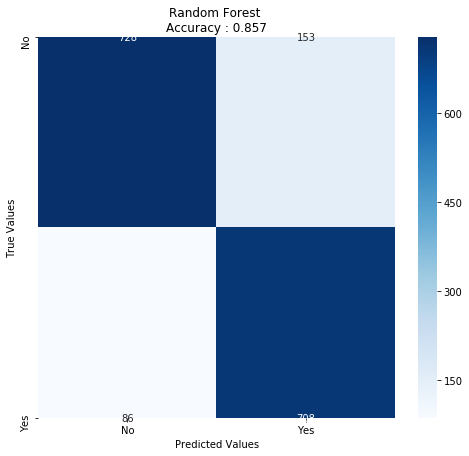

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8, 7))
sns.heatmap(cm_df, annot = True, fmt = 'g', cmap = 'Blues')
plt.title('Random Forest \nAccuracy : {0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Use SMOTE() function
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [ ]:
# Now use Standard Scaler
standard_scalar = StandardScaler()
X_train_scaled_resampled = standard_scaler.fit_transform(X_resampled)
X_test_scaled = standard_scaler.transform(X_test)

In [ ]:
# Fit to the Random Forest
clf_random.fit(X_train_scaled_resampled, y_resampled)

In [ ]:
#Predict on X_test_scaled
y_pred = clf_random.predict(X_test_scaled)

In [ ]:
# Generate the classification
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names = target_names))
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Plot the confusion matrix
cm_df = pd.DataFrame(cm,
                    index = ['No', 'Yes'],
                    columns = ['No', 'Yes'])
plt.figure(figsize = (8, 7))
sns.heatmap(cm_df, annot = True, fmt = 'g', cmap = 'Blues')
plt.title('Random Forest \nAccuracy : {0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [40]:
!pip install imblearn

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/eb/aa/eba717a14df36f0b6f000ebfaf24c3189cd7987130f66cc3513efead8c2a/imbalanced_learn-0.6.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/d0/5b7088d1fb891596c34c8b09414cd3daef99876349dd686a3ad536cf9820/scikit_learn-0.22.1-cp37-cp37m-win_amd64.whl
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.21.3.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.

